In [15]:
import numpy as np
import matplotlib.pyplot as plt
from ot_mmd.mmdot import solve_apgd
from ot_mmd.utils import get_cost_G, get_marginals, get_t
import torch

def template_measure(pcase, nsample):
    x1 = np.linspace(0.0, 0.2, nsample)
    a1 = np.ones(nsample)
    a1[0], a1[-1] = 0.0, 0.0
    if pcase == "bal":
        a1 = a1 / np.sum(a1)

    x2 = np.linspace(0.9, 1.0, nsample)
    a2 = (0.05 - np.abs(x2 - 0.95))*20
    a2[0], a2[-1] = 0.0, 0.0
    if pcase == "bal":
        a2 = a2 / np.sum(a2)

    x = np.concatenate((x1, x2))
    a = np.concatenate((0.65 * a1, 0.35 * a2))
    if pcase == "bal":
        a = a / np.sum(a)

    y1 = np.linspace(0.2, 0.4, nsample)
    b1 = np.linspace(0.0, 1.0, nsample)
    b1[0], b1[-1] = 0.0, 0.0
    if pcase == "bal":
        b1 = b1 / np.sum(b1)

    y2 = np.linspace(0.5, 0.9, nsample)
    b2 = np.sqrt(np.abs(1 - ((y2 - 0.7) / 0.2) ** 2))
    b2[0], b2[-1] = 0.0, 0.0
    if pcase == "bal":
        b2 = b2 / np.sum(b2)

    y = np.concatenate((y1, y2))
    b = np.concatenate((0.45 * b1, 0.55 * b2))
    if pcase == "bal":
        b = b / np.sum(b)

    return a, x, b, y, x1, x2, y1, y2

case = "bal"
nsample = 100
a, x, b, y, x1, x2, y1, y2 = template_measure(case, nsample)

max_itr = 1000
v = {1: get_t(a), 2: get_t(b)}

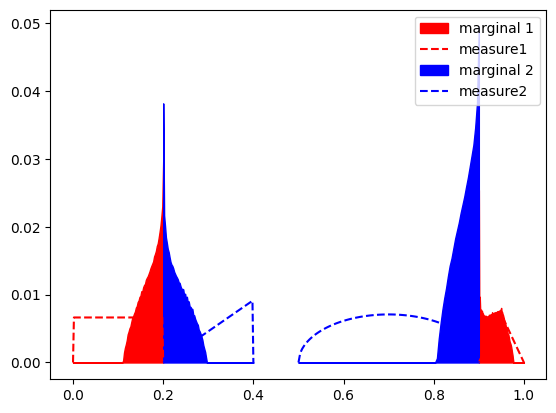

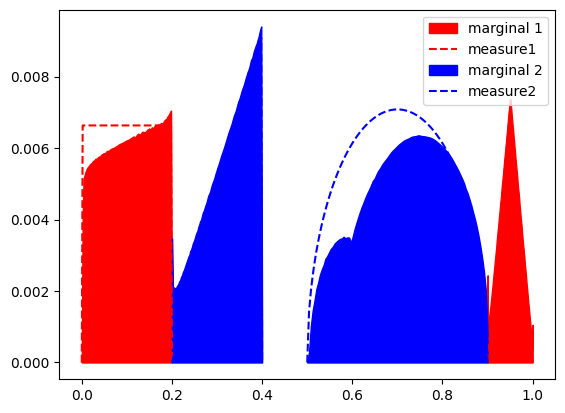

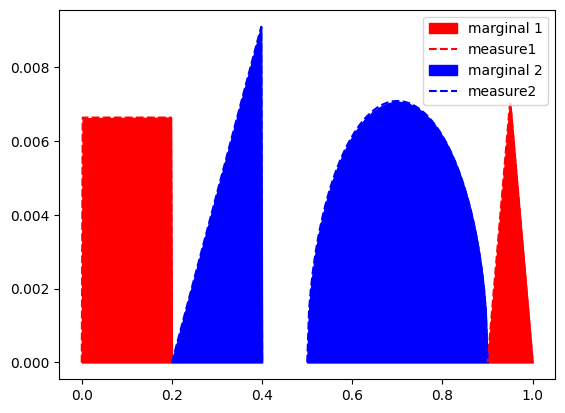

In [16]:
khp = 1e-6
ktype = "imq"
C, G = get_cost_G(get_t(x), get_t(y), khp=khp, ktype=ktype)

for lda in [1e-4, 1e-2, 1]:
    fname = f"{case}_{ktype}_{khp}_{lda}.jpg"
    pi, _ = solve_apgd(C, G, v, max_itr, lda, case=case)

    pi1, piT1 = get_marginals(pi)

    pi1 = pi1.cpu().numpy()
    piT1 = piT1.cpu().numpy()

    plt.clf()
    plt.fill_between(x1, 0, y2=pi1[:x1.shape[0]], color='red')
    plt.fill_between(x2, 0, y2=pi1[x1.shape[0]:], label='marginal 1', color='red')
    
    plt.plot(x1, a[:x1.shape[0]], linestyle='dashed', color='red')
    plt.plot(x2, a[x1.shape[0]:], label='measure1', linestyle='dashed', color='red')

    plt.fill_between(y1, 0, y2=piT1[:y1.shape[0]], color='blue')
    plt.fill_between(y2, 0, y2=piT1[y1.shape[0]:], label='marginal 2', color='blue')
    
    plt.plot(y1, b[:y1.shape[0]], linestyle='dashed', color='blue')
    plt.plot(y2, b[y1.shape[0]:], label='measure2', linestyle='dashed', color='blue')

    plt.legend(loc='upper right')
    plt.savefig('{}.jpg'.format(fname), bbox_inches = 'tight', pad_inches = 0.25)
    plt.show()

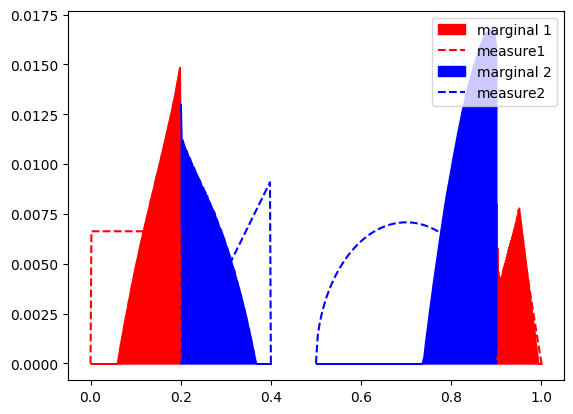

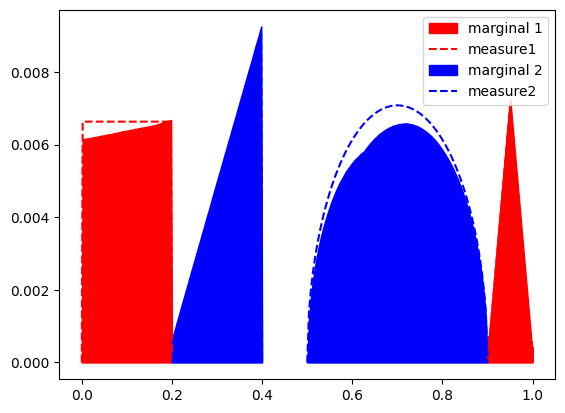

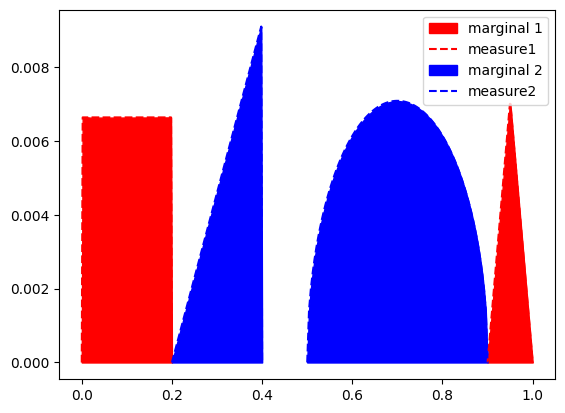

In [17]:
khp = 1e-6
ktype = "rbf"
C, G = get_cost_G(get_t(x), get_t(y), khp=khp, ktype=ktype)

for lda in [1, 100, 1e+4]:
    fname = f"{case}_{ktype}_{khp}_{lda}.jpg"
    pi, _ = solve_apgd(C, G, v, max_itr, lda, case=case)

    pi1, piT1 = get_marginals(pi)

    pi1 = pi1.cpu().numpy()
    piT1 = piT1.cpu().numpy()

    plt.clf()
    plt.fill_between(x1, 0, y2=pi1[:x1.shape[0]], color='red')
    plt.fill_between(x2, 0, y2=pi1[x1.shape[0]:], label='marginal 1', color='red')
    
    plt.plot(x1, a[:x1.shape[0]], linestyle='dashed', color='red')
    plt.plot(x2, a[x1.shape[0]:], label='measure1', linestyle='dashed', color='red')

    plt.fill_between(y1, 0, y2=piT1[:y1.shape[0]], color='blue')
    plt.fill_between(y2, 0, y2=piT1[y1.shape[0]:], label='marginal 2', color='blue')
    
    plt.plot(y1, b[:y1.shape[0]], linestyle='dashed', color='blue')
    plt.plot(y2, b[y1.shape[0]:], label='measure2', linestyle='dashed', color='blue')

    plt.legend(loc='upper right')
    plt.savefig('{}.jpg'.format(fname), bbox_inches = 'tight', pad_inches = 0.25)
    plt.show()